# Model 1

/home/matheus/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


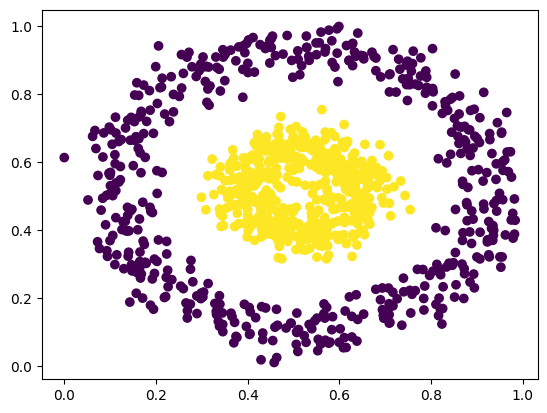

In [1]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import torch
import pandas as pd
from torch import nn
from helper_functions import plot_predictions, plot_decision_boundary

# Create the artificial dataset
X, y = make_circles(n_samples=1000, noise=0.1, factor=0.3, random_state=42)


# Turn the dataset in tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Normalizing the dataset
X = (X - X.min()) / (X.max() - X.min())
y = (y - y.min()) / (y.max() - y.min())

# Separating the data in training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.scatter(x=X[:, 0], y=X[:, 1], c=y)
plt.show()

In [6]:
y_train

tensor([1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
        0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
        1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1.,
        1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
        1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
        0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
        1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
        0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
        0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1.,
        1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1.,
        1., 1., 1., 0., 1., 0., 0., 0., 

In [2]:
df = pd.DataFrame({'X1': X[:, 0], 'X2': X[:, 1], 'y': y})
df

,X1,X2,y
0,0.615634,0.584529,1.0
1,0.443929,0.572805,1.0
2,0.367514,0.636980,1.0
3,0.394508,0.590286,1.0
4,0.708637,0.152051,0.0
...,...,...,...
995,0.628990,0.884922,0.0
996,0.105816,0.385039,0.0
997,0.515339,0.365310,1.0
998,0.784463,0.165734,0.0


In [3]:
class CircleDetection(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.sequence = nn.Sequential(
            nn.Linear(2, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
        )
    
    def forward(self, x):
        return self.sequence(x)
    
model_1 = CircleDetection()
model_1

CircleDetection(
  (sequence): Sequential(
    (0): Linear(in_features=2, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=1, bias=True)
  )
)

In [5]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.2)

# Write a training and evaluation loop for the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1500
ls = []


### Train
model_1.train()
for epoch in range(epochs):
    # 1. Forward
    pred = model_1(X_train).squeeze()

    # 2. Loss
    loss = loss_fn(pred, y_train)

    # 3. Backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        ls.append(float(loss))
        print('Epoch: {:<5d}   |  Loss: {:.5f}'.format(epoch, loss))
    


Epoch: 0       |  Loss: 0.69871
Epoch: 100     |  Loss: 0.62249
Epoch: 200     |  Loss: 0.30725
Epoch: 300     |  Loss: 0.06032
Epoch: 400     |  Loss: 0.02695
Epoch: 500     |  Loss: 0.01648
Epoch: 600     |  Loss: 0.01163
Epoch: 700     |  Loss: 0.00890
Epoch: 800     |  Loss: 0.00718
Epoch: 900     |  Loss: 0.00599
Epoch: 1000    |  Loss: 0.00513
Epoch: 1100    |  Loss: 0.00448
Epoch: 1200    |  Loss: 0.00397
Epoch: 1300    |  Loss: 0.00356
Epoch: 1400    |  Loss: 0.00323


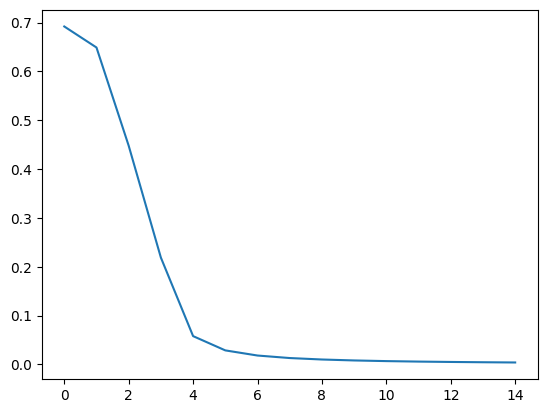

In [ ]:
plt.plot(ls)

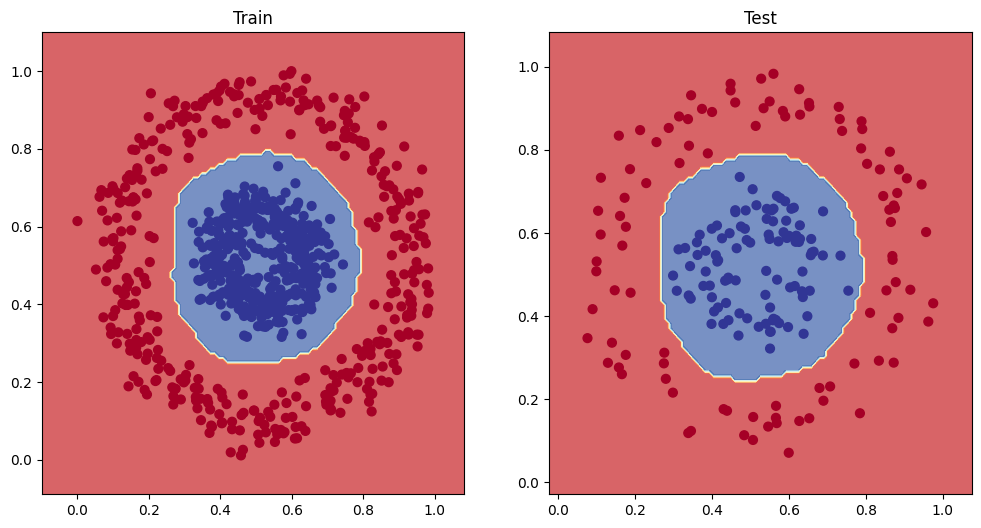

In [ ]:
# Ploting the decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_1, X_test, y_test)